In [10]:
#13 Baby Names
#mining baby names

import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
import zipfile
import os

In [4]:
#read in the names.zip and extract everything
zipfile.ZipFile('names.zip').extractall('.')

In [7]:
#view the files directly
os.listdir('names')[:10]

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt']

In [8]:
#use Python command to open a file
open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [12]:
#using pandas command to read the same file and assiging the 
#result to a variable
names2011 = pd.read_csv('names/yob2011.txt')


In [13]:
#display the first 5 elements
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [14]:
#adjust the reading so the header is corrected
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])

In [15]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [16]:
#display the last 5 elements
names2011.tail()

,name,sex,number
33864,Zylar,M,5
33865,Zylas,M,5
33866,Zyran,M,5
33867,Zyshawn,M,5
33868,Zytavion,M,5


In [19]:
#create a new list that contains all the names from all the years;
#add a year column also
names_all = []

for year in range(1880, 2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year), 
                                 names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year #append the year as the last column

#names_all

In [21]:
#now place all the list elements (data frames) into a single data frame
allyears = pd.concat(names_all)

allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [23]:
#create a new data frame that is indexed by sex, name, and year and sorted
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

allyears_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [25]:
#lookup Mary and Nima
allyears_indexed.loc['F', 'Mary'].head()

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217


In [31]:
allyears_indexed.loc['M', 'Nima'].head()

,number
year,
1971,5
1972,5
1976,5
1977,11
1978,17


In [32]:
#create a function to plot a name
def plotname(sex, name):
    data = allyears_indexed.loc[sex, name]
    pp.plot(data.index, data.values)

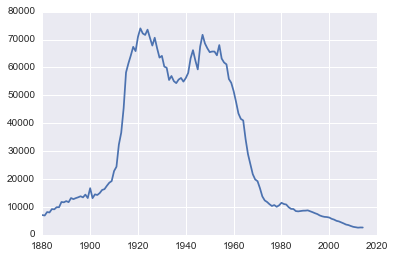

In [33]:
#plot Mary
plotname('F', 'Mary')

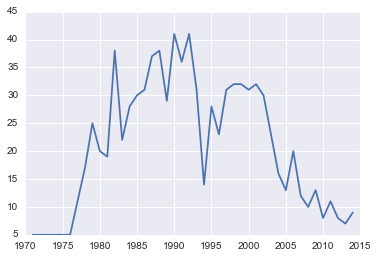

In [34]:
#plot Nima; notice the change in scale from Mary
plotname('M', 'Nima')

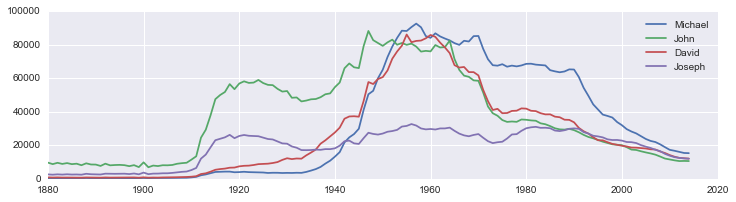

In [35]:
#loop through a collection of popular boys names and graph them all

pp.figure(figsize=(12, 3))

names = ['Michael', 'John', 'David', 'Joseph']

for name in names:
    plotname('M', name)

pp.legend(names)

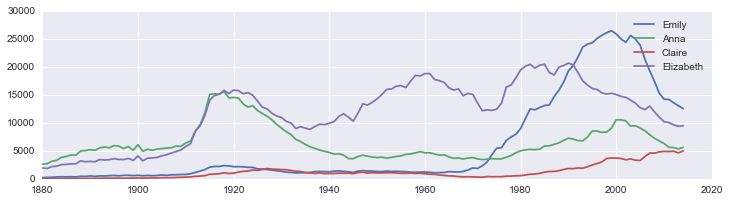

In [36]:
#loop through a collection of popular girls names and graph them all

pp.figure(figsize=(12, 3))

names = ['Emily', 'Anna', 'Claire', 'Elizabeth']

for name in names:
    plotname('F', name)

pp.legend(names)

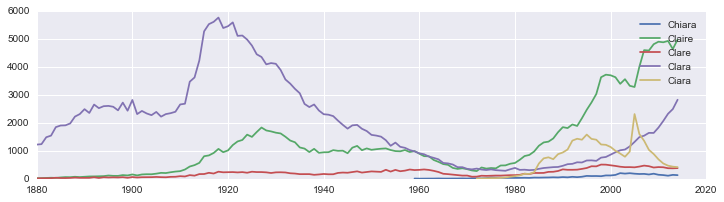

In [37]:
#compare the different spelling/sound of names for Claire

pp.figure(figsize=(12, 3))

names = ['Chiara', 'Claire', 'Clare', 'Clara', 'Ciara']

for name in names:
    plotname('F', name)

pp.legend(names)

In [38]:
names

['Chiara', 'Claire', 'Clare', 'Clara', 'Ciara']

In [41]:
#lookup the names in the names list
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [47]:
#unstack the data frame
#unstack means moving the innermost row index to become the innermost 
#column index
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    NaN   NaN   21.0  1226.0  15.0
1881    NaN   NaN   23.0  1242.0  20.0
1882    NaN   NaN   30.0  1490.0  21.0
1883    NaN   NaN   38.0  1548.0  22.0
1884    NaN   NaN   33.0  1852.0  38.0

In [48]:
#replace the NaNs with 0s
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    0.0   0.0   21.0  1226.0  15.0
1881    0.0   0.0   23.0  1242.0  20.0
1882    0.0   0.0   30.0  1490.0  21.0
1883    0.0   0.0   38.0  1548.0  22.0
1884    0.0   0.0   33.0  1852.0  38.0

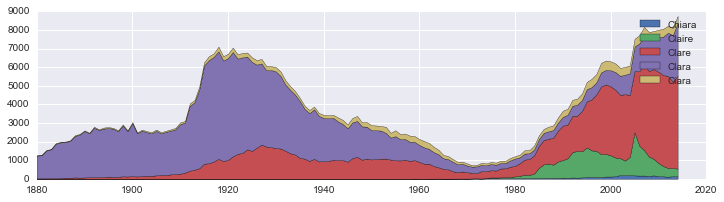

In [51]:
#do a stack plot; stack plot does not support legends

variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

pp.figure(figsize=(12, 3))
pp.stackplot(variants.index, variants.values.T)

pp.legend(names)

In [53]:
#popular boy names for 2008
pop2008 = allyears_indexed.loc['M',:,2008].sort_values(by='number', 
                                                       ascending=False)
pop2008.head()

number
sex name    year        
M   Jacob   2008   22568
    Michael 2008   20590
    Ethan   2008   20196
    Joshua  2008   19186
    Daniel  2008   18985

In [55]:
#reset te default index
pop2008.reset_index().head()

,sex,name,year,number
0,M,Jacob,2008,22568
1,M,Michael,2008,20590
2,M,Ethan,2008,20196
3,M,Joshua,2008,19186
4,M,Daniel,2008,18985


In [59]:
#drop columns sex, year, and number
#axis=1 denotes that we are referring to a column and not a row
pop2008.reset_index().drop(['sex', 'year', 'number'], axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [62]:
#create a function to do top ten names for any year based on gender

def topten(sex, year, total=10):
    simple = allyears_indexed.loc[sex,:,year].sort_values(by='number',
                                                         ascending=False)
    simple = simple.reset_index()
    simple = simple.drop(['sex', 'year', 'number'], axis=1).head(total)
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [64]:
topten('M', 2008, 20)

,2008
1,Jacob
2,Michael
3,Ethan
4,Joshua
5,Daniel
6,Alexander
7,William
8,Anthony
9,Christopher
10,Matthew


In [65]:
#creating a function that gives the top ten names over a range of years

def toptens(sex, year0, year1):
    years = [topten(sex, year) for year in range(year0, year1+1)]
    
    return years[0].join(years[1:])

In [67]:
toptens('M', 2002, 2007)

,2002,2003,2004,2005,2006,2007
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael
3,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan
4,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua
5,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel
6,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher
7,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony
8,Christopher,Daniel,William,Anthony,Christopher,William
9,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew
10,Daniel,Anthony,Christopher,Christopher,William,Andrew


In [69]:
toptens('F', 1990, 1997)

,1990,1991,1992,1993,1994,1995,1996,1997
1,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica,Emily,Emily
2,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley,Jessica,Jessica
3,Brittany,Brittany,Amanda,Sarah,Emily,Emily,Ashley,Ashley
4,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha,Sarah,Sarah
5,Samantha,Samantha,Sarah,Emily,Sarah,Sarah,Samantha,Hannah
6,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor,Taylor,Samantha
7,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah,Hannah,Taylor
8,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany,Alexis,Alexis
9,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda,Rachel,Elizabeth
10,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth,Elizabeth,Madison


In [71]:
#stack up the names
#stacking a data frame means moving the innermost column index to
#become the innermost row index

toptens('F', 1960, 1967).head()

,1960,1961,1962,1963,1964,1965,1966,1967
1,Mary,Mary,Lisa,Lisa,Lisa,Lisa,Lisa,Lisa
2,Susan,Lisa,Mary,Mary,Mary,Mary,Kimberly,Kimberly
3,Linda,Susan,Susan,Susan,Susan,Karen,Mary,Michelle
4,Karen,Linda,Karen,Karen,Karen,Kimberly,Michelle,Mary
5,Donna,Karen,Linda,Linda,Patricia,Susan,Karen,Susan


In [75]:
toptens('F', 1960, 1967).stack().head()


1  1960    Mary
   1961    Mary
   1962    Lisa
   1963    Lisa
   1964    Lisa
dtype: object

In [78]:
#count the number of names for each name in the top ten years
toptens('F', 1960, 1967).stack().value_counts()

Susan       8
Lisa        8
Mary        8
Karen       8
Patricia    7
Linda       6
Donna       6
Cynthia     6
Kimberly    4
Tammy       3
Angela      3
Deborah     3
Sandra      3
Michelle    2
Jennifer    2
Lori        1
Melissa     1
Debra       1
dtype: int64

In [79]:
#get the popular names from our latest data frame
popular = toptens('F', 1960, 1967).stack().value_counts().index[:6]

In [80]:
popular

Index(['Susan', 'Lisa', 'Mary', 'Karen', 'Patricia', 'Linda'], dtype='object')

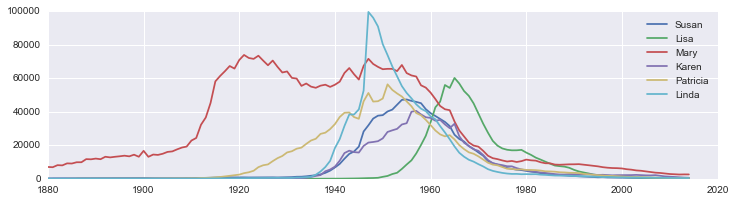

In [81]:
#plot the popular names

pp.figure(figsize=(12, 3))

for name in popular:
    plotname('F', name)

pp.legend(popular)